In [142]:
import numpy as np
import matplotlib

from analytics.fork_join_model import ForkJoinModel
from pyqumo.simulations.forkjoin.sandbox.model import simulate_forkjoin
from sim.inputs import _fit_map, _fit_ph

from pyqumo.randoms import MarkovArrival, PhaseType
from pyqumo.simulations.forkjoin.contract import ForkJoinResults

import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec


import numpy as np
import math

import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use( 'seaborn-v0_8-white',)
sns.set_style("whitegrid", {'legend.frameon':True})

In [53]:
def _run(arrival, services, size):
    simulation = simulate_forkjoin(
        arrival=arrival,
        services=[services, services],
        capacities=[size, 1_000_000_000],
        max_packets=10_000_000
    )
    
    analytics = ForkJoinModel(
         (arrival.d0, arrival.d1),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         size + 1,
     )

    analytics.calculate()

    return analytics, simulation 

def validate_monte_carlo_method():
    loss_prob = {
        'analytics': [],
        'simulation': []
    }

    queue_size = {
        'analytics': [],
        'simulation': []        
    }

    x = []
    
    map = MarkovArrival.poisson(1)
    ph = PhaseType.exponential(10)
    
    
    for i in range(1, 11, 1):
        map = MarkovArrival.poisson(i)
        analytics, simulation = _run(map, ph, 5)

        print(i)
        
        loss_prob['analytics'].append(analytics.get_metrics()['loss_prob'])
        loss_prob['simulation'].append(simulation.packet_drop_prob)

        queue_size['analytics'].append(analytics.get_metrics()['q_mean'])
        queue_size['simulation'].append(simulation.system_sizes[0].mean)

        
        x.append(i)

    print(x)
    print(loss_prob)
    print(queue_size)

validate_monte_carlo_method()

1
2
3
4
5
6
7
8
9
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
{'analytics': [0.14285707326060473, -2.3474974619484247e-16, -1.3374065308156261e-14, 6.870431207753789e-15, 6.930085763539498e-15, -1.9357875684081065e-16, 6.516276333732396e-15, -8.922463949061168e-15, -4.224704069139127e-15, 5.6200405927496106e-15], 'simulation': [4e-07, 4.83e-05, 0.0005007, 0.0024572002457200247, 0.007902300790230079, 0.01910560573168172, 0.03852060385206039, 0.0664361, 0.10204641020464102, 0.1430356]}
{'analytics': [2.999998664621014, -2.2626155409982827e-15, -1.1040510589864774e-13, 5.1915270455742086e-14, 4.978465583334482e-14, -1.3487208731739684e-15, 4.435046616128983e-14, -5.972030909436595e-14, -2.7909271076522026e-14, 3.677206481575797e-14], 'simulation': [0.11101464283245982, 0.2498044984451428, 0.42699151746095093, 0.6550160049372117, 0.9447982328213533, 1.296677435205364, 1.7061878552589889, 2.1439934026899286, 2.582568057298687, 3.001800466854804]}


In [46]:
analytic_metrics = analytics.get_metrics()
# limit queue
print(simulation.system_sizes[0].mean, analytic_metrics['q_mean'])
# unlimit queue
print(simulation.system_sizes[1].mean, analytic_metrics['p_mean'])
#loss prob
print(simulation.packet_drop_prob, analytic_metrics['loss_prob'])

25.369119639528872 25.499885114433614
43.34171166726625 44.81815912897165
0.01902568645172723 0.01923067372043256


## Validation Monte-Carlo method

In [78]:
## by queue size
queue_x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
queue_loss_prob = {
    'analytics': [0.49999997576725597, 0.24999993714710272, 0.16666659014714197, 0.12499992493019466, 0.09999992032741307, 0.08333324465065946, 0.07142848649768047, 0.06249991270037515, 0.05555546773734055, 0.04999990717776713, 0.04545445462052377], 
    'simulation': [0.499768249976825, 0.2497767, 0.16688760013256007, 0.12472298730609112, 0.10029419026477124, 0.08326569159226076, 0.0717921158853099, 0.0625382, 0.055672855672855674, 0.05019698533487507, 0.04520183616146893]
}
queue_queue_size = {
    'analytics': [0.49999997576725597, 1.499999650583404, 2.499998948751272, 3.4999980824800625, 4.499996735447932, 5.499994676127517, 6.499992974689513, 7.499990481719915, 8.49998779598792, 9.499983984916232, 10.499980949567954], 
    'simulation': [0.49992872827952056, 1.4996368666671063, 2.5017900099743393, 3.498698849534528, 4.50439733538804, 5.495610310897187, 6.509728977881453, 7.508516053789092, 8.49785651188691, 9.52204391903379, 10.460378122320908]
}

## by arrival intencity
arr_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
arr_loss_prob = {
    'analytics': [8.996048009390672e-07, 5.1199764201936536e-05, 0.00051040982762828, 0.0024616312498796982, 0.007874011455282387, 0.019199864126304627, 0.03846221383493013, 0.06634162941618132, 0.10186651253969455, 0.14285707326060568], 
    'simulation': [0.0, 5.8e-05, 0.00053, 0.0023760095040380163, 0.007698, 0.01893005679017037, 0.03844207688415377, 0.06622019866059599, 0.10159260955565734, 0.14334928669857339]
}
arr_queue_size = {
    'analytics': [0.11111039014977146, 0.24991036136794828, 0.4270401251729868, 0.655178979243783, 0.9448817522133811, 1.2984010514664979, 1.7051164815050912, 2.142433152754356, 2.582405727876686, 2.9999986646210233],
    'simulation': [0.11093268421760999, 0.24967390369037068, 0.42707005282918087, 0.6558770612598052, 0.9424598236204549, 1.2906648623826684, 1.7098367648268225, 2.1454315041901686, 2.57594413496065, 3.0048056843061213]
}

## by ph intencity
ph_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ph_loss_prob = {
     'analytics': [0.14285707326060593, 0.007874011455281948, 0.0009149106393872084, 0.00018311605087960886, 5.119976420193633e-05, 1.786056005756006e-05, 7.28544927338069e-06, 3.3375429997903097e-06, 1.6724926451823217e-06, 8.996048009390672e-07], 
     'simulation': [0.14239285435712615, 0.007795007795007795, 0.000987, 0.000134, 5.4e-05, 1.2e-05, 8e-06, 1e-06, 2e-06, 0.0]
}
ph_queue_size = {
    'analytics': [2.9999986646210246, 0.944881752213375, 0.49679771375522347, 0.3329060375328439, 0.2499103613679485, 0.1999749619936487, 0.16665815986011226, 0.14285378976832777, 0.1249985311896793, 0.11111039014977146], 
    'simulation': [2.990173675835277, 0.9404901464750964, 0.49593978617708084, 0.3330567585816127, 0.2496755097399033, 0.19949476211359327, 0.166534970237746, 0.14256344523488446, 0.12492781268799877, 0.11114394376679082]
}

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_1132/3678099395.py:46: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


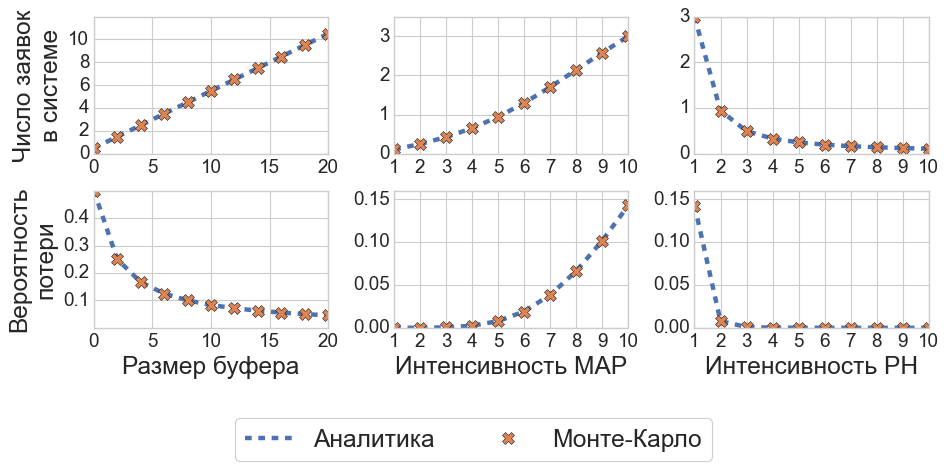

In [143]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=22
linewidth=4
markersize=10
tickfontsize=17

ax1.plot(queue_x, queue_queue_size['analytics'], linestyle='dashed', linewidth=linewidth)
ax1.plot(queue_x, queue_queue_size['simulation'], marker='X', linewidth=0, markersize=markersize)
ax1.set_ylabel("Число заявок\nв системе", fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax1.set_yticks([0, 2, 4, 6, 8, 10])
ax1.set_xticks([0, 5, 10, 15, 20])


ax4.plot(queue_x, queue_loss_prob['analytics'], linestyle='dashed', linewidth=linewidth)
ax4.plot(queue_x, queue_loss_prob['simulation'], marker='X', linewidth=0, markersize=markersize)
ax4.set_xlabel("Размер буфера", fontsize=fontsize, labelpad=5)
ax4.set_ylabel("Вероятность\nпотери", fontsize=fontsize)
ax4.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax4.set_yticks([0.1, 0.2, 0.3, 0.4])
ax4.set_xticks([0, 5, 10, 15, 20])

ax2.plot(arr_x, arr_queue_size['analytics'], linestyle='dashed', linewidth=linewidth)
ax2.plot(arr_x, arr_queue_size['simulation'], marker='X', linewidth=0, markersize=markersize)
ax2.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax2.set_yticks([0, 1, 2, 3])

ax5.plot(arr_x, arr_loss_prob['analytics'], linestyle='dashed', linewidth=linewidth)
ax5.plot(arr_x, arr_loss_prob['simulation'], marker='X', linewidth=0, markersize=markersize)
ax5.set_xlabel("Интенсивность MAP", fontsize=fontsize, labelpad=5)
ax5.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax5.set_yticks([0, 0.05, 0.1, 0.15])

ax3.plot(ph_x, ph_queue_size['analytics'], linestyle='dashed', linewidth=linewidth)
ax3.plot(ph_x, ph_queue_size['simulation'], marker='X', linewidth=0, markersize=markersize)
ax3.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax3.set_yticks([0, 1, 2, 3])

ax6.plot(ph_x, ph_loss_prob['analytics'], linestyle='dashed', linewidth=linewidth, label='Аналитика')
ax6.plot(ph_x, ph_loss_prob['simulation'], marker='X', linewidth=0, markersize=markersize, label='Монте-Карло')
ax6.set_xlabel("Интенсивность PH", fontsize=fontsize, labelpad=5)
ax6.tick_params(axis='both', which='major', labelsize=tickfontsize)
ax6.set_yticks([0, 0.05, 0.1, 0.15])

fig.tight_layout()

fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
           bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=22, frameon=True)

fig.savefig('sim_validation.png',  bbox_inches="tight")

In [9]:
x = []
loss_prob = {
    'analytics': [],
    'simulation': []
}

queue_size = {
    'analytics': [],
    'simulation': []        
}

for i in range(1, 11):
    arrival = MarkovArrival.poisson(1)
    ph = PhaseType.exponential(i)

    analytics = ForkJoinModel(
         (arrival.d0, arrival.d1),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         6,
    )

    analytics.calculate()
    print(analytics.get_metrics())

    simulation = simulate_forkjoin(
        arrival=arrival,
        services=[ph, ph],
        capacities=[5, 1_000_000_000],
        max_packets=1_000_000
    )

    print(simulation.system_sizes[0].mean, analytics.get_metrics()['q_mean'])
    # unlimit queue
    print(simulation.system_sizes[1].mean, analytics.get_metrics()['p_mean'])
    #loss prob
    print(simulation.packet_drop_prob, analytics.get_metrics()['loss_prob'])

    loss_prob['analytics'].append(analytics.get_metrics()['loss_prob'])
    loss_prob['simulation'].append(simulation.packet_drop_prob)

    queue_size['analytics'].append(analytics.get_metrics()['q_mean'])
    queue_size['simulation'].append(simulation.system_sizes[0].mean)
    x.append(i)

print(x)
print(loss_prob)
print(queue_size)

{'loss_prob': 0.14285707326060593, 'q_mean': 2.9999986646210246, 'p_mean': 5.165922776166567}
2.990173675835277 2.9999986646210246
5.151434941141672 5.165922776166567
0.14239285435712615 0.14285707326060593
{'loss_prob': 0.007874011455281948, 'q_mean': 0.944881752213375, 'p_mean': 0.9707946514981262}
0.9404901464750964 0.944881752213375
0.9701476048499492 0.9707946514981262
0.007795007795007795 0.007874011455281948
{'loss_prob': 0.0009149106393872084, 'q_mean': 0.49679771375522347, 'p_mean': 0.49846040530322805}
0.49593978617708084 0.49679771375522347
0.4976054754220774 0.49846040530322805
0.000987 0.0009149106393872084
{'loss_prob': 0.00018311605087960886, 'q_mean': 0.3329060375328439, 'p_mean': 0.33313588705606784}
0.3330567585816127 0.3329060375328439
0.33330593759211874 0.33313588705606784
0.000134 0.00018311605087960886
{'loss_prob': 5.119976420193633e-05, 'q_mean': 0.2499103613679485, 'p_mean': 0.24995934092739505}
0.2496755097399033 0.2499103613679485
0.24967846777961847 0.24995

## Analytics dependence time from map size, ph size and buffer size

### Map size

In [13]:
map_sizes = [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 50]

res_x = []
res = []

for map_size in map_sizes:
    print([i for i in range(1, map_size + 1)], [1 / map_size for i in range(1, map_size + 1)])
    hyper_exp_map = PhaseType.hyperexponential([i for i in range(1, map_size + 1)], [1 / map_size for i in range(1, map_size + 1)])
    print(hyper_exp_map.p)
    arrival = MarkovArrival.phase_type(np.asarray(hyper_exp_map.s), np.asarray(hyper_exp_map.p))
   
    ph = PhaseType.exponential(1)

    analytics = ForkJoinModel(
         (arrival.d0, arrival.d1),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         6,
    )

    cur_time = time.time()
    analytics.calculate()
    res_x.append(map_size)
    res.append(time.time() - cur_time)
    print(f'map size: {map_size} takes {time.time() - cur_time}')
    
print(res_x)
print(res)

[1] [1.0]
[1.]
<class 'numpy.ndarray'>
map size: 1 takes 0.01921987533569336
[1, 2, 3, 4] [0.25, 0.25, 0.25, 0.25]
[0.25 0.25 0.25 0.25]
<class 'numpy.ndarray'>
map size: 4 takes 0.10612034797668457
[1, 2, 3, 4, 5, 6, 7, 8] [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
<class 'numpy.ndarray'>
map size: 8 takes 0.2649872303009033
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333]
[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
<class 'numpy.ndarray'>
map size: 12 takes 0.5542178153991699
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.062

In [7]:
map_szies = [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 50]
times = [0.01921820640563965, 0.10611820220947266, 0.2649862766265869, 0.5542159080505371, 1.106290340423584, 1.5316309928894043, 2.2343130111694336, 3.201470136642456, 5.738358020782471, 8.705651998519897, 15.734725952148438, 30.710391998291016]


[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Ph size 

In [17]:
ph_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

res_x = []
res = []

for ph_size in ph_sizes:
    ph = PhaseType.hyperexponential([i for i in range(1, ph_size + 1)], [1 / ph_size for i in range(1, ph_size + 1)])
    arrival = MarkovArrival.poisson(ph_size)
   
    analytics = ForkJoinModel(
         (arrival.d0, arrival.d1),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         6,
    )

    cur_time = time.time()
    analytics.calculate()
    res_x.append(ph_size)
    res.append(time.time() - cur_time)
    print(f'ph size: {ph_size} takes {time.time() - cur_time}')
    
print(res_x)
print(res)

ph size: 1 takes 0.02000594139099121
ph size: 2 takes 0.0927727222442627
ph size: 3 takes 0.24371814727783203
ph size: 4 takes 1.0729761123657227
ph size: 5 takes 2.0513551235198975
ph size: 6 takes 6.788771152496338
ph size: 7 takes 19.781368017196655
ph size: 8 takes 52.39440989494324
ph size: 9 takes 143.4868950843811
ph size: 10 takes 485.59265303611755
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.020003795623779297, 0.09276890754699707, 0.24371623992919922, 1.0729751586914062, 2.0513532161712646, 6.788769245147705, 19.781366109848022, 52.39440703392029, 143.48689317703247, 485.59262895584106]


### Buffer size

In [22]:
buffer_sizes = [i for i in range(5, 101, 5)]

res_x = []
res = []

for size in buffer_sizes:
    ph = PhaseType.exponential(1)
    arrival = MarkovArrival.poisson(1)
   
    analytics = ForkJoinModel(
         (arrival.d0, arrival.d1),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         (ph.s, ph.p.reshape((1, ph.p.shape[0]))),
         size,
    )

    cur_time = time.time()
    analytics.calculate()
    res_x.append(size)
    res.append(time.time() - cur_time)
    print(f'buffer size: {size} takes {time.time() - cur_time}')
    
print(res_x)
print(res)

buffer size: 5 takes 0.015557050704956055
buffer size: 10 takes 0.023878812789916992
buffer size: 15 takes 0.054986000061035156
buffer size: 20 takes 0.06114506721496582
buffer size: 25 takes 0.07151627540588379
buffer size: 30 takes 0.12484192848205566
buffer size: 35 takes 0.12217593193054199
buffer size: 40 takes 0.151536226272583
buffer size: 45 takes 0.21657800674438477
buffer size: 50 takes 0.26500892639160156
buffer size: 55 takes 0.27698588371276855
buffer size: 60 takes 0.34549999237060547
buffer size: 65 takes 0.39641904830932617
buffer size: 70 takes 0.4516019821166992
buffer size: 75 takes 0.5501899719238281
buffer size: 80 takes 0.6224780082702637
buffer size: 85 takes 0.7203528881072998
buffer size: 90 takes 0.7456567287445068
buffer size: 95 takes 0.7312548160552979
buffer size: 100 takes 0.8938710689544678
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[0.015555143356323242, 0.023875951766967773, 0.05498385429382324, 0.06114315986633301

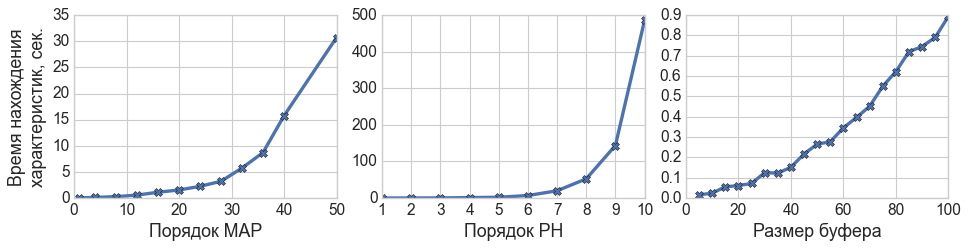

In [144]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)

map_sizes = [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 50]
map_times = [0.01921820640563965, 0.10611820220947266, 0.2649862766265869, 0.5542159080505371, 1.106290340423584, 1.5316309928894043, 2.2343130111694336, 3.201470136642456, 5.738358020782471, 8.705651998519897, 15.734725952148438, 30.710391998291016]

ph_sizes =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ph_times = [0.020003795623779297, 0.09276890754699707, 0.24371623992919922, 1.0729751586914062, 2.0513532161712646, 6.788769245147705, 19.781366109848022, 52.39440703392029, 143.48689317703247, 485.59262895584106]

buffer_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
buffer_times = [0.015555143356323242, 0.023875951766967773, 0.05498385429382324, 0.06114315986633301, 0.07151412963867188, 0.12483882904052734, 0.12217402458190918, 0.1515340805053711, 0.21657609939575195, 0.26500701904296875, 0.27698493003845215, 0.34549927711486816, 0.39641809463500977, 0.4515998363494873, 0.5501887798309326, 0.6224758625030518, 0.7203512191772461, 0.7456550598144531, 0.791252908706665, 0.8938701152801514]

linewidth = 3
fontsize=16
ticklabelsize=14

ax1.plot(
    map_sizes,
    map_times,
    linewidth=linewidth,
    marker='X',
    markersize=8
)
ax1.set_xlabel('Порядок MAP', fontsize=fontsize)
ax1.set_ylabel('Время нахождения\nхарактеристик, сек.', fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=ticklabelsize)

ax2.plot(
    ph_sizes,
    ph_times,
    linewidth=linewidth,
    marker='X',
    markersize=8
)
ax2.set_xlabel('Порядок PH', fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=ticklabelsize)

ax3.plot(
    buffer_sizes,
    buffer_times,
    linewidth=linewidth,
    marker='X',
    markersize=8
)
ax3.set_xlabel('Размер буфера', fontsize=fontsize)
ax3.tick_params(axis='both', which='major', labelsize=ticklabelsize)
fig.savefig('analytics_dependencies.png')

In [61]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Method monte carlo: dependence calculation time from system params

### Packets count

In [102]:
packet_counts = [i * 1_000_000 for i in range(2, 21, 2)]

res_x = []
res = []

ph_size = 10

for packet_count in packet_counts:
    ph = PhaseType.exponential(ph_size)
    arrival = MarkovArrival.poisson(ph_size)

    cur_time = time.time()
    
    simulation = simulate_forkjoin(
        arrival=arrival,
        services=[ph, ph],
        capacities=[size, 1_000_000_000],
        max_packets=packet_count
    )

    simulation.busy[0].precision

    res_x.append(ph_size)
    res.append(time.time() - cur_time)
    print(f'packets count: {packet_count} takes {time.time() - cur_time}')
    
print(res_x)
print(res)

packets count: 2000000 takes 12.882191181182861
packets count: 4000000 takes 22.387914180755615
packets count: 6000000 takes 33.75097298622131
packets count: 8000000 takes 44.51391291618347
packets count: 10000000 takes 56.509037733078
packets count: 12000000 takes 69.07243704795837
packets count: 14000000 takes 79.19129490852356
packets count: 16000000 takes 88.8885178565979
packets count: 18000000 takes 100.00414204597473
packets count: 20000000 takes 124.25984215736389
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[12.88218641281128, 22.38791012763977, 33.75096893310547, 44.51390814781189, 56.50903296470642, 69.07243204116821, 79.19128274917603, 88.88849115371704, 100.00413703918457, 124.25981497764587]


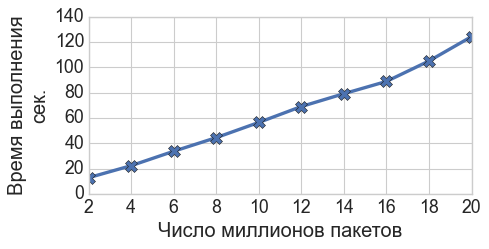

In [148]:
packets_count = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
times = [12.88, 22.38, 33.75, 44.51, 56.50, 69.07, 79.19, 88.88, 105.01, 124.25]

fig, ax = plt.subplots(1, 1, figsize=(6, 3), constrained_layout=True)

ax.plot(
    packets_count,
    times,
    linewidth=3,
    marker='X',
    markersize=10
)
ax.set_ylabel('Время выполнения\nсек.', fontsize=18)
ax.set_xlabel('Число миллионов пакетов', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.savefig('sim_execution_time_dependency.png')